# Couverture de Graphe :

#### Biblioteque utilisées :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from math import *
from random import *
import networkx as nx
import time
from collections import deque


%matplotlib notebook

In [2]:
#import sys
#sys.getrecursionlimit()
#sys.setrecursionlimit(3000)

## 1. Introduction :

In [3]:
def lecture_graphe(fichier):
    with open(fichier, 'r') as fichier_graph:
        N = 0
        M = 0
        noeuds = []
        aretes = []
        for i, line in enumerate(fichier_graph):
            if i == 1:
                N = int(line)
            if i >=3 and i<N+3:
                noeuds.append(int(line))
            if i==3+N+1:
                M = line
            if i>3+N+2:
                aretes.append((int(line[0]), int(line[2])))
    G = nx.Graph()
    G.add_nodes_from(noeuds)
    G.add_edges_from(aretes)
    return G

In [4]:
LG = lecture_graphe("exempleinstance.txt")

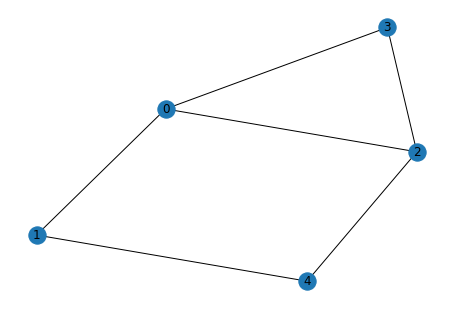

In [5]:
nx.draw(LG, with_labels=True)

## 2. Graphes :

### 2.1 : Opérations de base : 

In [6]:
def Remove(G,v):
    """
    G : networkx.Graph, v : int -> networkx.graph
    retourne le Graphe G - v
    """
    Gp = nx.Graph.copy(G)
    Gp.remove_node(v)
    return Gp

def RemoveL(G,V):
    """
    G : networkx.Graph, V : list(int) -> networkx.Graph
    retourne le Graphe G - [v_ in V]
    """
    if type(V) == int:    #On gere le cas si l'utilsateur s'est trompé est à rentré un entier
        return Remove(G,V)
    if len(V)==0:     #On gere le cas si la liste ne contient pas d'entier
        return G
    if len(V)==1 or type(V)==int:
        return Remove(G,V[0])
    Gp = nx.Graph.copy(G)
    Gp.remove_nodes_from(V)
    return Gp

def Degre(G):
    """
    G : networkx.Graph -> list(int, int)
    retirune l'ensemble des (sommets, degres) de G 
    """
    return nx.degree(G)
    #return list(dict(Degre(G)).values())

def DegreM(G):
    """
    G : networkx.Graph -> int
    retourne le sommet de degre max sous forme de tuple
    """
    if list(G.edges()):
        degre = Degre(G)
        L = sorted([[values, key] for key, values in dict(degre).items()])
        m = max(L)
        return [m[1], m[0]]
    return[0,0]

### 2.2 : Génération d'instances  : 

In [7]:
def RandomG(n, p, time_ = False, debut = 0):
    """
    n : int, p : float, t : bool -> Graph
    t : permet de choisir si on veut retourner le temps de calcul(t=True) ou le resultat(t=False)
    retourne un Graphe de n sommets avec des aretes de proba p
    """
    t0 = time.time()
    
    G = nx.Graph()
    if n ==0:
        if time_ == True: 
            return time.time() - t0
        return G
    G.add_nodes_from(range(debut,n+debut))
    if p<0 or p>1:
        raise ValueError ( 'le nombre p doit etre dans [0,1]' )
    if p == 0 or p==0.0:
        if time_ == True:
            return time.time() - t0
        return G
    for i in range(debut, n+debut-1):
        L = []
        for j in range(i+1,n+debut):
            if random()<p:
                #print("(i,j)", (i,j))
                L.append((i,j))
        G.add_edges_from(L)
        
    if time_ == True:
        return time.time()-t0
    return G

On test rapidement nos fonctions : 

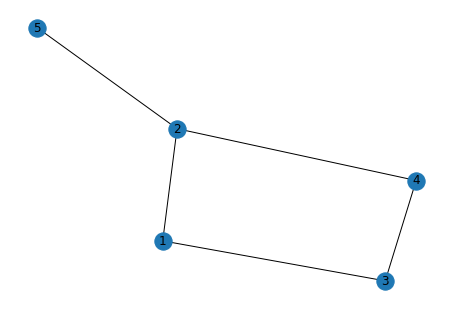

In [8]:
#Première façon de créer un graphe 

GT = nx.Graph()     #On déclare le graphe
GT.add_nodes_from(range(1,6))    #On rajoute les noeuds
GT.add_edges_from([(1,2),(1,3), (3,4), (4,2),(2,5)])    #On rajoute les arêtes
nx.draw(GT, with_labels=True)    #On affiche notre graphe

In [9]:
noeuds = 5   #le nombre de noeuds qu'on veut pour notre graphe
proba = .5   #la probabilite pour qu'une arrete connecte deux sommets

G1 = RandomG(noeuds,proba)   #On genere un graphe random

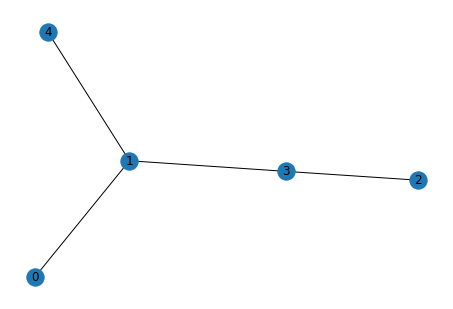

In [10]:
#On affiche le graphe ainsi crée :
nx.draw(G1, with_labels=True)

In [11]:
d = Degre(G1)
dmax = DegreM(G1)
print("La liste des degres du graphe G1 est : ",d)
print("Le sommet %d"%dmax[0]," est de degré maximal %d"%dmax[1])

La liste des degres du graphe G1 est :  [(0, 1), (1, 3), (2, 1), (3, 2), (4, 1)]
Le sommet 1  est de degré maximal 3


In [12]:
#On enleve le sommet de degre max
s = dmax[0]
G2 = Remove(G1,s)

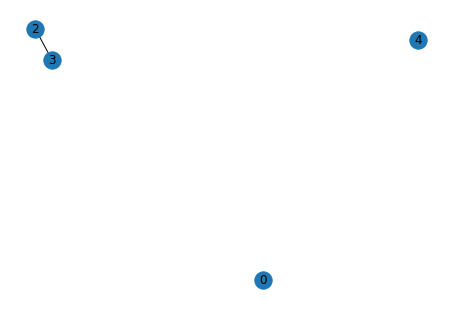

In [13]:
nx.draw(G2, with_labels=True)

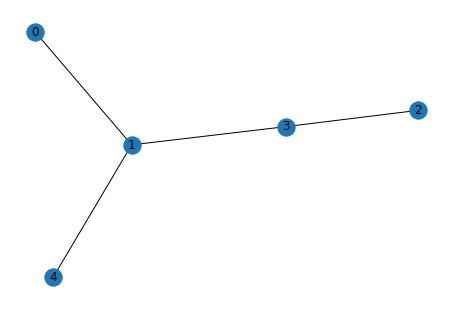

In [14]:
nx.draw(G1, with_labels=True)

Le premier graphe n'est pas modifié par notre fonction. En effet notre fonction crée une copie du graphe initial puis renvoie ce dernier. On pourrait néanmoins discuter de l'efficacité de cette implémentation.

On va réaliser un test sur le temps de calcul de la fonction `RandomG(n, p, time_ = True)` c'est pour cela qu'on a instancié le parametre `time_ = True`.

Dans toute la suite où on va devoir réliser des tests : $n \in\{Nmax/10,\ 2Nmax/10,\ 3Nmax/10, ...,\ Nmax\}$

In [15]:
global Tmax, probaG, step_test

Tmax = 4    #Temps max pour un algorithme
probaG = 1  #Proba pire temps pour la création de Graphes Random, en effet toutes les arrêtes son connectées
step_test = 100  #Le pas de sommets pour le test sur le temps de calcul 

In [16]:
def N_maxR(algo, proba = lambda i : 1./np.sqrt(i)):
    """
    algo : function -> int
    Mesure le nombre d'instances jusqu’a laquelle l’algorithme tourne rapidement
    """
    #if type(proba)==int or type(proba)==float:#On calcul le nouveau temps de création d'un Graph random
    #    n_ = 0   #Le nombre de sommets au début du test sur le temps de calcul 
    #    temps_algo = algo(n_, proba, True)
    #else:
    #    n_ = 1   #Le nombre de sommets au début du test sur le temps de calcul 
    #    temps_algo = algo(n_, proba(n_), True)
    temps_algo = 0
    n_ =0
    while(temps_algo <= Tmax):   #Si le temps de de calcul <= Temps_max on continue
        n_ += step_test   #On rajoute step_test sommets
        if type(proba)==int or type(proba)==float:#On calcul le nouveau temps de création d'un Graph random
            temps_algo = algo(n_, proba, True)
        else:
            temps_algo = algo(n_, proba(n_), True) 
    return n_-step_test    #Le nombre de sommets max pour lequel notre algo ne depasse pas Tmax secondes

def generMoy(Nm, proba = lambda i : 1./np.sqrt(i)):
    """
    Nm : int -> (list(float), np.array(float))
    retourne la moyenne sur 10 intances du temps de cration d'un graphe random pour n comme prece
    """
    i_ = 10
    N_  = np.linspace(Nm/10, Nm, 10)
    tempsM_= []
    for n in  N_:
        if type(proba)==int or type(proba)==float:
            m = np.mean([RandomG(int(n), proba, True) for i in range(i_)])
        else:
            m = np.mean([RandomG(int(n), proba(int(n)), True) for i in range(i_)])
        tempsM_.append(m)
    return tempsM_, N_

In [17]:
global Nmax_R, Nmax_Rd, Nmax_Rs

Nmax_R = N_maxR(RandomG, probaG)   #Nombre max d'instance pour notre fonction RandomG avec proba 1
print("Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de 1 est : ", Nmax_R)

Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de 1 est :  2400


In [18]:
Nmax_Rd = N_maxR(RandomG, .1)    #Nombre max d'instance pour notre fonction RandomG avec proba 0.1
print("Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de .1 est : ", Nmax_Rd)

Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de .1 est :  6100


In [19]:
Nmax_Rs = N_maxR(RandomG)    ##Nombre max d'instance pour notre fonction RandomG avec proba 1/racine(n)
print("Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de inverse est : ", Nmax_Rs)

Le nombre maximal de noeuds pour notre algorithme RandomG avec une proba de inverse est :  7700


In [20]:
M_R, N_R = generMoy(Nmax_R, proba = probaG)     #

In [21]:
M_Rd, N_Rd = generMoy(Nmax_Rd, proba = .1)

In [22]:
M_Rs, N_Rs = generMoy(Nmax_Rs)

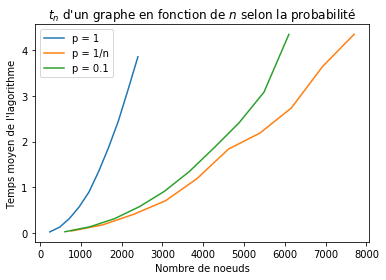

In [23]:
plt.figure(1)
plt.plot(N_R, M_R)
plt.plot(N_Rs, M_Rs)
plt.plot(N_Rd, M_Rd)
#plt.axis([0,2500, -3.5, 1.5])
#plt.axis([0,2500, 0, 4.5])
plt.title("$t_n$ d'un graphe en fonction de $n$ selon la probabilité")
#plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.legend(("p = 1","p = 1/n","p = 0.1"))
plt.show()

In [24]:
def testAlgo_proba(algo, Nmax, p):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    P  = np.linspace(0,1,11)
    P_algo = []
    for p in P:
        m = np.mean([algo(Nmax, p, time_ = True)for i in range(i_)])
        P_algo.append(m)
    
    return P_algo, P

In [25]:
T_PR, P_ = testAlgo_proba(RandomG, Nmax_R, probaG)

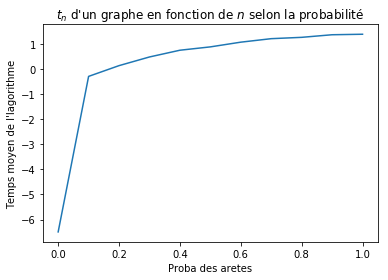

In [26]:
plt.figure(2)
plt.plot(P_, np.log(T_PR))
plt.title("$t_n$ d'un graphe en fonction de $n$ selon la probabilité")
#plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Proba des aretes")
plt.show()

## 3. Méthodes approchées :

In [27]:
def algo_couplage(G, time_ = False):
    """
    G : networkx(Graph), t : bool -> list(int)
    t : permet de choisir si on veut retourner le temps de calcul(t=True) ou le resultat(t=False)
    retourne une couverture
    """
    t0 = time.time()   #On initilise le timer
    
    Cover =[]
    for e in list(G.edges()):   #On itere sur les arretes de G
        if(e[0] not in Cover) and (e[1] not in Cover):    #On verifie qu'aucun des deux sommets ne se trouve dans C
            #print(e)
            Cover.append(e[0])  #On rajoute les deux sommets dans C
            Cover.append(e[1])
            
    if time_ == True:   #Si on a choisi d'afficher le temps on le fait
        return time.time() - t0
    return Cover    #Sinon on retorune la couverture


def algo_glouton(G, time_ = False):  
    """
    G : networkx(Graph), t : bool-> list(int)
    t : permet de choisir si on veut retourner le temps de calcul(t=True) ou le resultat(t=False)
    retourne une couverture
    """
    t0 = time.time()
    C = nx.Graph()  
    Gt = nx.Graph.copy(G)
    edges = Gt.edges() 
    while(edges):  
        v = DegreM(Gt)  
        C.add_node(v[0])   
        Gt.remove_node(v[0])
        
    if time_ == True:
        return time.time()-t0
    return list(C.nodes)

In [28]:
algo_couplage(GT)

[1, 2, 3, 4]

In [29]:
algo_glouton(GT)

[2, 3]

In [30]:
algo_couplage(G1)

[0, 1, 2, 3]

In [31]:
algo_glouton(G1) 

[1, 3]

On va réaliser un test sur le temps de calcul et la qualité des réponses de nos deux fonctions `algo_couplage(G, time_ = True)` et  `algo_glouton(G, time_ = True)`c'est pour cela qu'on a instancié le parametre `time_ = True`. 

In [32]:
def N_max(algo, proba = lambda i : 1./np.sqrt(i)):
    """
    algo : function -> int
    Mesure le nombre d'instances max pour lequel l’algorithme tourne rapidement
    """

    #if type(proba)==int or type(proba)==float:
    #    n_ = 0   #Le nombre de sommets au début du test sur le temps de calcul 
    #    temps_algo = algo(RandomG(n_,proba), True)
    #else:
    #    n_ = 1
    #    temps_algo = algo(RandomG(n_,proba(n_)), True)
    temps_algo = 0
    n_ = 0
    while(temps_algo <= Tmax):    #Si le temps de de calcul <= Temps_max on continue
        n_ += step_test   #On rajoute step_test sommets
        if type(proba)==int or type(proba)==float:
            R = RandomG(n_,proba)
            temps_algo = algo(R, True)   #On calcul le nouveau temps de création d'un Graph random
        else:
            R = RandomG(n_,proba(n_))
            temps_algo = algo(R, True)   #On calcul le nouveau temps de création d'un Graph random
    return n_-step_test    #Le nombre de sommets max pour lequel notre algo ne depasse pas Tmax secondes
    

def testAlgo_time(algo1,algo2, Nmax1, Nmax2):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    N1  = np.linspace(Nmax1/10,Nmax1,10)
    N2  = np.linspace(Nmax2/10,Nmax2,10)
    T_algo1 = []
    for n in N1:
        m = np.mean([algo1(RandomG(int(n), probaG), True) for i in range(i_)])
        T_algo1.append(m)
    
    T_algo2 = []
    for n in N2:
        m = np.mean([algo2(RandomG(int(n), probaG), True) for i in range(i_)])
        T_algo2.append(m)
        
    return T_algo1, N1, T_algo2, N2

def testAlgo_solutions(algo1,algo2, Nmax1, Nmax2, proba = lambda i : 1./np.sqrt(i) ):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    N1  = np.linspace(Nmax1/10,Nmax1,10)
    N2  = np.linspace(Nmax2/10,Nmax2,10)
    
    L_algo1 = []
    for n in N1:
        if type(proba)==int or type(proba)==float:
            m = np.mean([len(algo1(RandomG(int(n), proba))) for i in range(i_)])
        else:
            m = np.mean([len(algo1(RandomG(int(n), proba(int(n))))) for i in range(i_)])
        L_algo1.append(m)
    
    L_algo2 = []
    for n in N2:
        if type(proba)==int or type(proba)==float:
            m = np.mean([len(algo2(RandomG(int(n), proba))) for i in range(i_)])
        else:
            m = np.mean([len(algo1(RandomG(int(n), proba(int(n))))) for i in range(i_)])
        L_algo2.append(m)
    return L_algo1, L_algo2

def testAlgo_solutions2(algo1,algo2, Nmax1):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    P  = np.linspace(0,1,11)
    L_algo1 = []
    for p in P:
        m = np.mean([len(algo1(RandomG(Nmax1, p))) for i in range(i_)])
        L_algo1.append(m)
    
    L_algo2 = []
    for p in P:
        m = np.mean([len(algo2(RandomG(Nmax1, p))) for i in range(i_)])
        L_algo2.append(m)
    return L_algo1, L_algo2, P

In [33]:
global Nmax_C, Nmax_G
step_test = 200

In [34]:
Nmax_C = N_max(algo_couplage, proba = probaG)
print("Le nombre maximal de noeuds pour algo_couplage est : ", Nmax_C)

Le nombre maximal de noeuds pour algo_couplage est :  1200


In [35]:
Nmax_G = N_max(algo_glouton, proba = probaG)
print("Le nombre maximal de noeuds pour algo_glouton est : ", Nmax_G)

Le nombre maximal de noeuds pour algo_glouton est :  400


In [36]:
T_C, N_C, T_G, N_G = testAlgo_time(algo_couplage, algo_glouton, Nmax_C, Nmax_G)

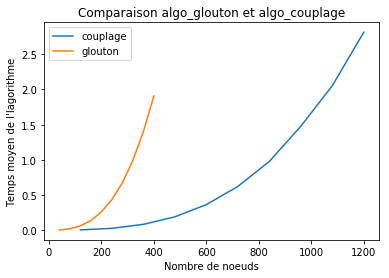

In [37]:
plt.figure(3)
plt.plot(N_C, T_C)
plt.plot(N_G, T_G)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Comparaison algo_glouton et algo_couplage")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.legend(("couplage","glouton"))
plt.show()

In [38]:
L_C, L_G = testAlgo_solutions(algo_couplage, algo_glouton, Nmax_C, Nmax_G, proba=probaG)

In [39]:
L_Cd, L_Gd = testAlgo_solutions(algo_couplage, algo_glouton, Nmax_C, Nmax_G, proba=.1)

In [40]:
L_Cs, L_Gs = testAlgo_solutions(algo_couplage, algo_glouton, Nmax_C, Nmax_G)

In [41]:
L_Cd

[113.2, 233.6, 353.4, 474.4, 591.4, 713.4, 833.2, 953.8, 1073.6, 1192.6]

In [42]:
L_Gd

[22.4, 54.5, 90.9, 127.9, 165.2, 203.0, 241.5, 279.9, 318.7, 358.9]

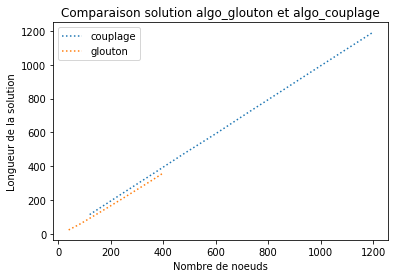

In [43]:
plt.figure(4)
#plt.plot(N_C, L_C, linestyle="--")
#plt.plot(N_G, L_G, linestyle="--")
plt.plot(N_C, L_Cd, linestyle=":")
plt.plot(N_G, L_Gd, linestyle=":")
#plt.plot(N_C, L_Cs, linestyle="-.")
#plt.plot(N_G, L_Gs, linestyle="-.")
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Comparaison solution algo_glouton et algo_couplage")
plt.ylabel("Longueur de la solution")
plt.xlabel("Nombre de noeuds")
plt.legend(("couplage","glouton"))
plt.show()


In [44]:
L_PC, L_PG, P_CG = testAlgo_solutions2(algo_couplage, algo_glouton, Nmax_G)

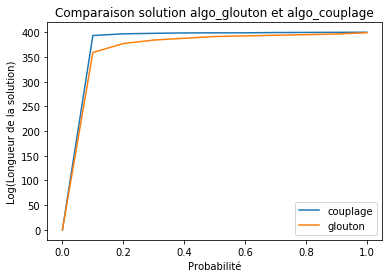

In [45]:
plt.figure(5)
plt.plot(P_, L_PC)
plt.plot(P_, L_PG)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Comparaison solution algo_glouton et algo_couplage")
plt.ylabel("Log(Longueur de la solution)")
plt.xlabel("Probabilité")
plt.legend(("couplage","glouton"))
plt.show()

## 4. Séparation et évaluation :

###  4.1 Branchement :

In [46]:
GTEST = RandomG(22,.5)

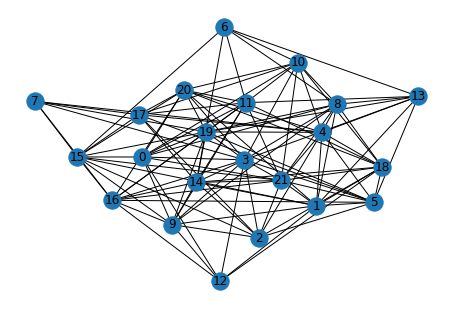

In [47]:
nx.draw(GTEST, with_labels=True)

Version Branchement simple avec recursivité double 

In [48]:
def BranchRecursivite2(G, Gm, P, S, time_ = False, noeuds_ = False):
    """
    G : nx.Graph(), Gm : nx.Graph(), P : list(), S : list(), time_ : bool, noeuds_ : bool -> list(int)
    time_ : Si True renvoie aussi le temps de calcul 
    noeuds_ : si True renvoie aussi le nombre de noeuds
    retourne une couverture de longueur minimale
    """
    global etape, timer   #variables globales qui permettent de garder le temps et le nombre de noeuds 
    etape+=1
    #print("etape : ",etape)
    timer = time.time()
    edges = list(Gm.edges) 
    
    if len(edges) == 0:     #Si il n'y a plus d'arretes dans le Graphe courant on a trouvé une solution
        #print("ON y est ")
        S.append(P.pop())     #On rajoute cette solution dans S en la dépilant de le pile 
        if len(P) == 0:    #Cas d'arret, notre pile est vide
            noeuds = etape     #On se sert de la variable globale pour avoir le nombre de noeuds sans avoir a passer un parametre en plus 
            etape = 0     #On remet la variable globale a 0 pour les prochaines execution
            if time_ == True :     #Si on veut avoir le temps d'execution
                t0 = timer    #Meme methode que pour le temps
                timer = 0     #On remet a 0
                if noeuds_ == True:    #et le nombre de noeuds
                    return min(S, key = len), time.time() - t0 , noeuds
                return min(S, key = len), time.time() - t0
            elif time_ == False:
                if noeuds_ == True:     #Que le nombre de noeuds 
                    return min(S, key = len), noeuds
            return min(S, key = len)
        #Si la pile n'est pas vide on elague 
        return BranchRecursivite2(G, RemoveL(G, P[len(P)-1]), P, S, time_, noeuds_)     #Appel de recursion sur le graphe prive du nouveau dernier membre de la pile 
        
    e = edges[0]    #On prend une arrete au hasard, disons la premiere
    if len(P)!=0:    
        r = P.pop()     #On regarde les arretes qu'on a enleve jusqu'a maintenant 
        r0 = r.copy()   
        r0.append(e[0])    #On rajoute un sommet de l'arrete choisie dans les arretes enelvees actuellement
        r1 = r.copy()
        r1.append(e[1])    #On rajoute l'autre sommet de l'arrete choisie
        P.append(r0)    #On rajoute les deux possibilites a la pile 
        P.append(r1)
    else:  #La pile est vide car c'est le premier noeud
        P.append([e[0]])    #On rajoute un sommet de l'arrete choisie dans la pile
        P.append([e[1]])    #On rajoute l'autre sommet de l'arrete choisie dans la pile
    return BranchRecursivite2(G, RemoveL(G, P[len(P)-1]), P, S, time_, noeuds_)    #On appel par recursion sur le graph prive du dernier membre de la pile


Version Branchement simple avec recursivité simple 

In [49]:
def BranchRecusivite1(G, Gm, P, S, time_ = False, noeuds_ = False):
    """
    G : nx.Graph(), Gm : nx.Graph(), P : list(), S : list(), time_ : bool, noeuds_ : bool -> list(int)
    time_ : Si True renvoie aussi le temps de calcul 
    noeuds_ : si True renvoie aussi le nombre de noeuds
    retourne une couverture de longueur minimale
    """
    global etape, timer
    etape+=1
    timer = time.time()
    E = list(Gm.edges) 
    while E:
        e = E[0]    #On prend une arrete au hasard, disons la premiere
        if len(P)!=0:    
            r = P.pop()     #On regarde les arretes qu'on a enleve jusqu'a maintenant 
            r0 = r.copy()   
            r0.append(e[0])    #On rajoute un sommet de l'arrete choisie dans les arretes enelvees actuellement
            r1 = r.copy()
            r1.append(e[1])    #On rajoute l'autre sommet de l'arrete choisie
            P.append(r0)    #On rajoute les deux possibilites a la pile 
            P.append(r1)
            E = list(RemoveL(Gm, P[len(P)-1]).edges) 
            etape+=1
        else:  #La pile est vide car c'est le premier noeud
            P.append([e[0]])    #On rajoute un sommet de l'arrete choisie dans la pile
            P.append([e[1]])    #On rajoute l'autre sommet de l'arrete choisie dans la pile
            E = list(RemoveL(Gm, P[len(P)-1]).edges) 
            etape+=1
    S.append(P.pop())     #On rajoute cette solution dans S en la dépilant de le pile 
    if len(P)==0:    #Cas d'arret, notre pile est vide
        noeuds = etape     #On se sert de la variable globale pour avoir le nombre de noeuds sans avoir a passer un parametre en plus 
        etape = 0     #On remet la variable globale a 0 pour les prochaines execution
        if time_ == True :     #Si on veut avoir le temps d'execution
            t0 = timer    #Meme methode que pour le temps
            timer = 0     #On remet a 0
            if noeuds_ == True:    #Et le nombre de noeuds
                return min(S, key = len), time.time() - t0, noeuds
            return min(S, key = len), time.time() - t0
        elif time_ == False:
            if noeuds_ == True:     #Que le nombre de noeuds 
                return min(S, key = len), noeuds
        return min(S, key = len)
        #Si la pile n'est pas vide on elague 
    return BranchRecusivite1(G, RemoveL(G, P[len(P)-1]), P, S, time_, noeuds_)     #Appel de recursion sur le graphe prive du nouveau dernier membre de la pile
    

Le probleme des versions recursives est qu'on atteint rapidement la limite de recusivite de la pile avant d'etteindre les 4 secondes.

Version Branchement simple sans recursivite inspirée de la version recursive

In [50]:
def BranchF(G, time_  = False, noeuds_ = False):
    """
    G : nx.Graph(), time_ : bool, noeuds_ : bool -> list(int)
    time_ : Si True renvoie aussi le temps de calcul 
    noeuds_ : si True renvoie aussi le nombre de noeuds
    retourne une couverture de longueur minimale
    """
    t0 = time.time() 
    
    edges = list(G.edges)
    if len(edges) == 0:  #Il n'y a aucune arete on s'arrete 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0

        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return []
    
    Pile = []
    Cover = []
    noeuds = 1 #Sinon on a deja le noeud initial
    e = edges[0]
    Pile.append([e[0]])    #On rajoute un sommet de l'arrete choisie dans la pile
    Pile.append([e[1]])    #On rajoute l'autre sommet de l'arrete choisie dans la pile 
    noeuds += 2   #On vientv de créer deux noeudss à notre arbre
    
    while(Pile):   #equivalent a while(len(Pile) != 0)
        edges = list(RemoveL(G, Pile[len(Pile)-1]).edges) 
        while(edges):     #equivalent a while(len(Pile) != 0)
            e = edges[0]    #On prend une arrete au hasard, disons la premiere
            
            if Pile:      #equivalent a if len(Pile) ! =0   
                n = Pile.pop()     #On regarde les arretes qu'on a enleve jusqu'a maintenant 
                n0 = n.copy()   
                n0.append(e[0])    #On rajoute un sommet de l'arrete choisie dans les arretes enelvees actuellement
                n1 = n.copy()
                n1.append(e[1])    #On rajoute l'autre sommet de l'arrete choisie
                Pile.append(n0)    #On rajoute les deux possibilites a la pile 
                Pile.append(n1)
                noeuds+=2     #deux noeuds de plus
            edges = list(RemoveL(G, Pile[len(Pile)-1]).edges)  
        Cover.append(Pile[len(Pile)-1])     #On rajoute cette solution dans S en la dépilant de le pile 
        edges = list(RemoveL(G, Pile[len(Pile)-1]).edges)
        Pile.pop()
        

    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return min(Cover, key = len), time.time() - t0, noeuds
        return min(Cover, key = len), time.time() - t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return min(Cover, key = len), noeuds
    return min(Cover, key = len)

Cette méthode est plus rapide mais le problème est qu'en reprenant exactement la construction de la fonction récursive on a des cas redondants avec deux boucnes `while`. 
Deuxiéme fonction non récursive :

In [51]:
def BranchS(G, time_ = False, noeuds_ =False): 
    """
    G : nx.Graph(), time_ : bool, noeuds_ : bool -> list(int)
    time_ : Si True renvoie aussi le temps de calcul 
    noeuds_ : si True renvoie aussi le nombre de noeuds
    retourne une couverture de longueur minimale
    """
    t0 = time.time()

    if len(list(G.edges())) == 0: 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0

        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return []
        
     
    Pile = []
    Cover = [] 
    noeuds = 1
    edges = list(G.edges())

    n0, n1 = edges[0] #recupere arete 
    Pile.append([n0]) 
    Pile.append([n1]) 
    noeuds+=2
    
    while Pile :  
        n = Pile.pop() 
        edges = list(RemoveL(G, n).edges()) 
        if edges :
            n0, n1 = edges[0] 
            Pile.append(n+[n0]) 
            noeuds += 1 
            Pile.append(n+[n1]) 
            noeuds += 1
        else:
            Cover.append(n)
            
    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return min(Cover, key = len), time.time() - t0, noeuds
        return min(Cover, key = len), time.time() - t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return min(Cover, key = len), noeuds
    return min(Cover, key = len)

In [52]:
BranchF(GT, time_=True, noeuds_=True)

([2, 3], 0.0009942054748535156, 13)

In [53]:
BranchS(GT, time_=True, noeuds_=True)

([2, 3], 0.0006692409515380859, 13)

In [54]:
Pile1 = []
VC1 = []
etape = 0
Res1 = BranchRecursivite2(GT,GT, Pile1,VC1, time_ = True, noeuds_=True)
print("Le resultat est :", Res1)

Le resultat est : ([2, 3], 1.0013580322265625e-05, 13)


In [55]:
Pile2 = []
VC2 = []
Res2 = BranchRecusivite1(GT,GT, Pile1,VC2, time_ = True, noeuds_= True)
print("Le resultat est :", Res2)

Le resultat est : ([2, 3], 1.0013580322265625e-05, 13)


In [56]:
BranchS(G1, time_=True, noeuds_=True)

([1, 3], 0.0005259513854980469, 11)

In [57]:
BranchF(G1, time_=True, noeuds_=True)

([1, 3], 0.0009949207305908203, 11)

In [58]:
Pile1 = []
VC1 = []
Res1 = BranchRecursivite2(G1,G1, Pile1,VC1, time_ = True, noeuds_=True)
print("Le resultat est :", Res1)

Le resultat est : ([1, 3], 1.0013580322265625e-05, 11)


In [59]:
Pile2 = []
VC2 = []
Res2 = BranchRecusivite1(G1,G1, Pile1,VC2, time_ = True, noeuds_= True)
print("Le resultat est :", Res2)

Le resultat est : ([1, 3], 1.1920928955078125e-05, 11)


In [60]:
def Nmax_Branch(algo, proba = lambda i : 1./np.sqrt(i)):
    """
    algo : function -> int
    Mesure le nombre d'instances max pour lequel l’algorithme tourne rapidement
    """
    #n_ = 0
    #if type(proba)==int or type(proba)==float:
    #    R = RandomG(n_, proba)
    #else:
    #    R = RandomG(n_, proba(n_))
    #temps_algo = algo(R, time_ = True)
    temps_algo = (0, 0)
    n_ = 0
    while(temps_algo[1] <= Tmax):    #Si le temps de de calcul <= Temps_max on continue
        n_ += step_test   #On rajoute step_test sommets
        if type(proba)==int or type(proba)==float:
            R = RandomG(n_, proba)
        else:
            R = RandomG(n_, proba(n_))
        temps_algo = algo(R, time_ = True)   #On calcul le nouveau temps de création d'un Graph random
        #print("temps_algo  pour %d "%n_," :", temps_algo)
    return n_-step_test    #Le nombre de sommets max pour lequel notre algo ne depasse pas Tmax secondes


In [61]:
global Nmax_BF, Nmax_BS
step_test=1

In [62]:
Nmax_BF = Nmax_Branch(BranchF, proba = probaG)
print("Le nombre maximal de noeuds pour notre algorithme BranchF : ", Nmax_BF)

Le nombre maximal de noeuds pour notre algorithme BranchF :  13


In [63]:
Nmax_BS = Nmax_Branch(BranchS, proba = probaG)
print("Le nombre maximal de noeuds pour notre algorithme BranchS est : ", Nmax_BS)

Le nombre maximal de noeuds pour notre algorithme BranchS est :  14


In [64]:
def testAlgo_timeBranch(algo, Nmax):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    N_  = np.linspace(Nmax/10,Nmax,10)
    T_algo = []
    for n in N_:
        m = np.mean([algo(RandomG(ceil(n), probaG), time_ = True)[1] for i in range(i_)])
        T_algo.append(m)
    
    return T_algo, N_

In [65]:
T_BF, N_BF = testAlgo_timeBranch(BranchF, Nmax_BF)

In [66]:
T_BS, N_BS = testAlgo_timeBranch(BranchS, Nmax_BS)

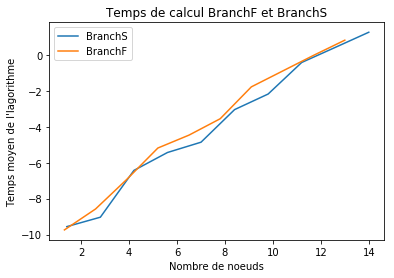

In [67]:
plt.figure(5)
plt.plot(N_BS, np.log(T_BS))
plt.plot(N_BF, np.log(T_BF))
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchF et BranchS")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.legend(("BranchS","BranchF"))
plt.show()

In [68]:
algo_couplage(GT)

[1, 2, 3, 4]

Donc algo polynomiale

In [69]:
def testAlgo_probaBranch(algo, Nmax):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    P  = np.linspace(0,1,11)
    P_algo = []
    for p in P:
        R = RandomG(Nmax, p)
        m = np.mean([algo(RandomG(Nmax, p), time_ = True)[1] for i in range(i_)])
        print("m :",m)
        P_algo.append(m)
    
    return P_algo, P

In [70]:
def testAlgo_noeudsBranch(algo, Nmax, proba = lambda i : 1./np.sqrt(i)):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    N_  = np.linspace(Nmax/10,Nmax,10)
    N_algo = []
    for n in N_:
        if type(proba)==int or type(proba)==float:
            m = np.mean([algo(RandomG(ceil(n), proba), noeuds_ = True)[1] for i in range(i_)])
        else:
            m = np.mean([algo(RandomG(ceil(n), proba(ceil(n))), noeuds_ = True)[1] for i in range(i_)])
        N_algo.append(m)
    
    return N_algo, N_

In [71]:
P_BF, P_ = testAlgo_probaBranch(BranchF, Nmax_BF)

m : 1.0776519775390626e-05
m : 0.00913379192352295
m : 0.07329192161560058
m : 0.11031613349914551
m : 0.38660316467285155
m : 0.6232511043548584
m : 0.6999767541885376
m : 1.114453673362732
m : 1.5873030185699464
m : 1.8183264970779418
m : 2.2579010009765623


In [72]:
P_BS, P_ = testAlgo_probaBranch(BranchS, Nmax_BS)

m : 1.5950202941894533e-05
m : 0.010212302207946777
m : 0.043635892868041995
m : 0.2936662197113037
m : 0.4811985492706299
m : 0.8820315361022949
m : 1.276063084602356
m : 1.8603901386260986
m : 2.2951352834701537
m : 3.026786756515503
m : 3.4721729040145872


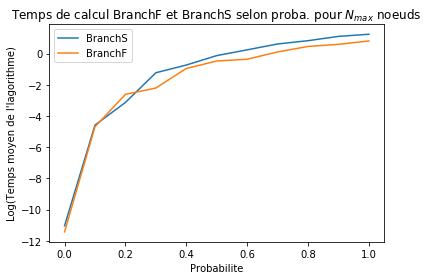

In [73]:
plt.figure(6)
plt.plot(P_, np.log(P_BS))
plt.plot(P_, np.log(P_BF))
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchF et BranchS selon proba. pour $N_{max}$ noeuds")
plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.xlabel("Probabilite")
plt.legend(("BranchS","BranchF"))
plt.show()
plt.show()

In [74]:
NodesS, N_NBS = testAlgo_noeudsBranch(BranchS, Nmax_BS, proba = probaG)

In [75]:
NodesF, N_NBF = testAlgo_noeudsBranch(BranchF, Nmax_BF, proba = probaG)

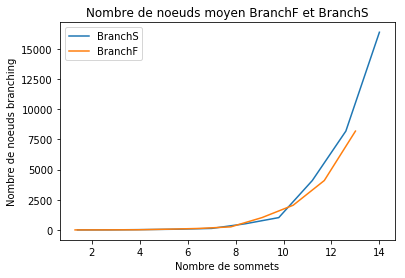

In [76]:
plt.figure(7)
plt.plot(N_NBS, NodesS)
plt.plot(N_NBF, NodesF)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Nombre de noeuds moyen BranchF et BranchS")
plt.ylabel("Nombre de noeuds branching")
plt.xlabel("Nombre de sommets")
plt.legend(("BranchS","BranchF"))
plt.show()

###  4.2 Ajout de bornes :

In [77]:
Break = RandomG(13, 1/sqrt(13))

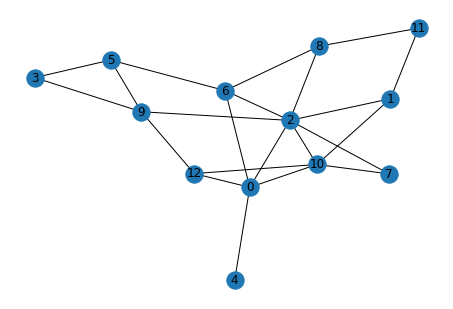

In [78]:
nx.draw(Break, with_labels=True)

In [79]:
[1, 6, 11, 9, 7, 5, 4]

[1, 6, 11, 9, 7, 5, 4]

In [80]:
BreakBranchF = BranchF(Break, time_ = True, noeuds_=True)

In [81]:
BreakBranchF

([2, 0, 10, 11, 5, 9, 8], 0.12183380126953125, 939)

In [82]:
BreakBranchS = BranchS(Break, time_ = True, noeuds_=True)

In [83]:
BreakBranchS

([2, 0, 10, 11, 5, 9, 8], 0.08023667335510254, 939)

In [84]:
def bound(G):
    """
    
    """
    M = algo_couplage(G)
    m = len(G.edges())
    n = len(G.nodes()) 
    b3 = (2*n-1-np.sqrt(np.power(2*n-1, 2)-8*m))/2
    if DegreM(G)[1] == 0:
        return b3
    
    b1 = ceil(m/ DegreM(G)[1])
    b2 = len(M)/2   #car arretes et pas sommets
    return max(b1, b2, b3)


def BranchBound(G, time_ = False, noeuds_ = False): 
    """
    
    """
    global b_max
    t0 = time.time()
    
    if list(G.edges()) == []: 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0
        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return [] 
    noeuds = 1 
    Pile = []
    Cover = [] 
     
    b_ = bound(G)
    #print(b_)
    edges = list(G.edges())

    n0, n1 = edges[0] #recupere arete 
    Pile.append([n0]) 
    Pile.append([n1]) 
    noeuds+=2
    #print("Pile debut :", Pile)
     
    while Pile :
        #print("-----------Etape %d"%noeuds,"-----------")
        n = Pile.pop() 
        #print("n while :", n)
        edges = list(RemoveL(G, n).edges()) 
        b_ = bound(RemoveL(G, n))
        #print("b_ a jour", bound(RemoveL(G, n)))
        #print("edges : ", edges)
        if edges: 
            n0, n1 = edges[0] 
            sol_couplage = algo_couplage(RemoveL(G,n0)) 
            #print("sol couplage1 : ", len(sol_couplage)/2)
            if len(Cover) < b_ or len(n)+b_<len(Cover): 
                Pile.append(n+[n0]) 
                noeuds += 1
  
            sol_couplage = algo_couplage(RemoveL(G,n1))
            #print("sol couplage2 : ", len(sol_couplage)/2)
            if len(Cover) < b_ or len(n)+b_<len(Cover) : 
                Pile.append(n+[n1]) 
                noeuds += 1
        elif Cover == [] or len(n) < len(Cover): #plus d'arete 
            Cover = n 
            #print("Cover elif : ", Cover)
        #print("Cover : ", Cover)
        
    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return Cover, time.time() - t0, noeuds
        return Cover, time.time() - t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return Cover, noeuds
    return Cover

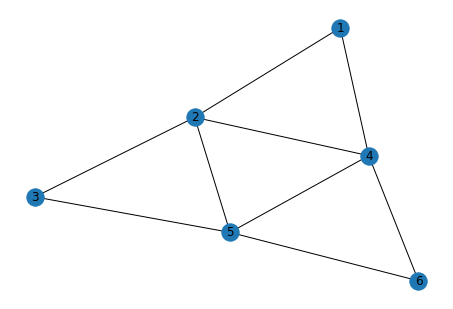

In [85]:
Dep = nx.Graph()
#Première façon de créer un graphe 
Dep.add_nodes_from(range(1,7))    #On rajoute les noeuds
Dep.add_edges_from([(1,2),(1,4), (2,3), (2,4),(2,5),(3,5), (4,6), (4,5),(5,6)])    #On rajoute les arêtes
nx.draw(Dep, with_labels=True)    #On affiche notre graphe

In [86]:
global Nmax_BBound, Nmax_BBoundd, Nmax_BBounds
step_test = 1

In [87]:
Nmax_BBound = Nmax_Branch(BranchBound, proba = probaG)

In [88]:
print("Le nombre maximal de noeuds pour notre algorithme BranchBound est de : ", Nmax_BBound)

Le nombre maximal de noeuds pour notre algorithme BranchBound est de :  76


In [89]:
Nmax_BBoundd = Nmax_Branch(BranchBound, proba = .1)

In [90]:
print("Le nombre maximal de noeuds pour notre algorithme BranchBound est de : ", Nmax_BBoundd)

Le nombre maximal de noeuds pour notre algorithme BranchBound est de :  38


In [91]:
Nmax_BBounds = Nmax_Branch(BranchBound)

In [92]:
print("Le nombre maximal de noeuds pour notre algorithme BranchBound est de : ", Nmax_BBounds)

Le nombre maximal de noeuds pour notre algorithme BranchBound est de :  28


In [93]:
def testAlgo_timeBranch2(algo, Nmax, proba = lambda i : 1./np.sqrt(i)):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    N_  = np.linspace(Nmax/10,Nmax,10)
    T_algo = []
    for n in N_:
        if type(proba)==int or type(proba)==float:
            m = np.mean([algo(RandomG(ceil(n), proba), time_ = True)[1] for i in range(i_)])
        else:
            m = np.mean([algo(RandomG(ceil(n), proba(n)), time_ = True)[1] for i in range(i_)])
        T_algo.append(m)
    
    return T_algo, N_

In [94]:
T_BB, N_BB = testAlgo_timeBranch2(BranchBound, Nmax_BBound, proba=probaG)

In [95]:
T_BBd, N_BBd = testAlgo_timeBranch2(BranchBound, Nmax_BBoundd, proba=.1)

In [96]:
T_BBs, N_BBs = testAlgo_timeBranch2(BranchBound, Nmax_BBounds)

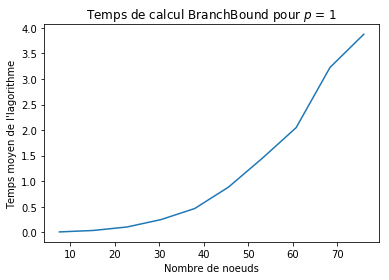

In [97]:
plt.figure(8)
plt.plot(N_BB, T_BB)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBound pour $p$ = 1")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.show()

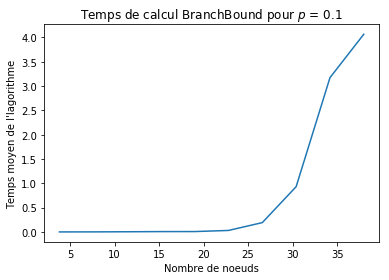

In [98]:
plt.figure(9)
plt.plot(N_BBd, T_BBd)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBound pour $p$ = 0.1")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.show()

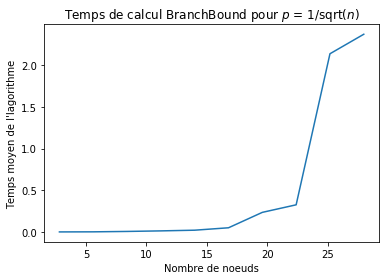

In [99]:
plt.figure(10)
plt.plot(N_BBs, T_BBs)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBound pour $p$ = 1/sqrt($n$)")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de noeuds")
plt.show()

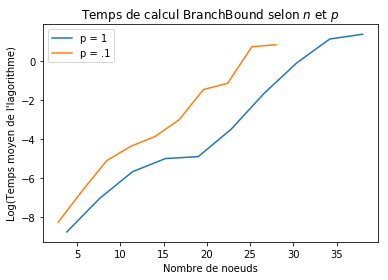

In [100]:
plt.figure(11)
#plt.plot(N_BB, np.log(T_BB))
plt.plot(N_BBd, np.log(T_BBd))
plt.plot(N_BBs, np.log(T_BBs))
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBound selon $n$ et $p$")
plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.xlabel("Nombre de noeuds")
plt.legend(("p = 1","p = .1", "p = 1/sqrt(n)"))
plt.show()

In [101]:
P_BB, P_ = testAlgo_probaBranch(BranchBound, 16)

m : 1.3303756713867187e-05
m : 0.006423807144165039
m : 0.02040712833404541
m : 0.036342954635620116
m : 0.1748232364654541
m : 0.38308279514312743
m : 0.6324773311614991
m : 0.8931747913360596
m : 2.544847011566162
m : 1.791404366493225
m : 0.03675539493560791


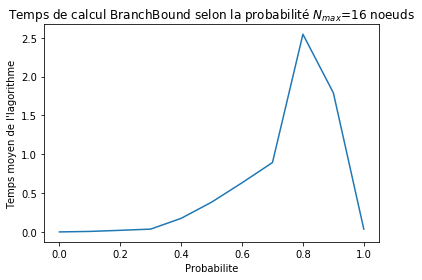

In [102]:
plt.figure(12)
plt.plot(P_, P_BB)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBound selon la probabilité $N_{max}$=16 noeuds")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Probabilite")
plt.show()

###  4.3 Amélioration du branchement :

On pourrait implémenter les noeuds de la même manière que précédement et même si cette méthode est plus rapide  le problème est qu'a chaque fois on doit recalculer `RemoveL(G, r)`, ce qui est assez coûteux. Un simple changement d'implémentation nous permet de gagner du temps. Au lieu d'avoir comme noeuds juste le sommet courant on rajoute simplement le graphe engendré. Ce petit coût mémoire nous permet en fin de compte de gagner pas mal de temps sur un nombre important de sommets et sera util par la suite du projet.

In [103]:
def BranchBoundU(G, time_ = False, noeuds_ =False): 
    """
    
    """
    t0 = time.time()

    if list(G.edges()) == []: 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0
        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return [] 
        
    noeuds = 1
    Pile = [] 
    Cover = [] 
    b_ = bound(G) 
    edges = list(G.edges())
    
    n0, n1 = edges[0] #recupere arete 
    #print("n0 :", n0 )
    #print("nv :", n1)
    G1 = nx.Graph.copy(G)
    G2 = nx.Graph.copy(G)
    G1 = RemoveL(G1,list(G[n1]))
    G1=Remove(G1, n1)
    G2 = RemoveL(G2,n1 ) 
    Pile.append((list(G[n1]), G1)) 
    Pile.append(([n1], G2) )
    noeuds += 2
    #print("Pile debut :", Pile)
    
    while Pile :  
        n, Gt = Pile.pop() 
        edges = list(Gt.edges()) 
        b_ = bound(Gt) 
        #print("edges : ", edges)
        if edges: 
            n0, n1 = edges[0] 
             
            G1 = nx.Graph.copy(Gt) 
            G2 = nx.Graph.copy(Gt) 
            G1 = RemoveL(G1, list(Gt[n1])) 
            G1 = Remove(G1, n1)
            G2 = RemoveL(G2, n1) 
             
            sol_couplage = algo_couplage(G1) 
            if len(Cover) < b_ or (len(n) + b_ < len(Cover)): 
                #print("noeuds 1 = ",(n+list(Gt[n1]), G1) )
                Pile.append((n+list(Gt[n1]), G1)) 
                noeuds+=1
 
            sol_couplage = algo_couplage(G2) 
            if len(Cover) < b_ or (len(n) + b_ < len(Cover)) : 
                #print("noeuds 1 = ",(n+[n1], G2) )
                Pile.append((n+[n1], G2)) 
                noeuds+=1
            #print("Pile wile : ", Pile)
        elif Cover == [] or len(n) < len(Cover): #plus d'arete 
            Cover = n 
            #print("Cover elif : ", Cover)
        #print("Cover : ", Cover)
        
    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return Cover, time.time()-t0, noeuds
        return Cover, time.time()-t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return Cover, noeuds
    return Cover

In [104]:
global Nmax_BBoundU, Nmax_BBoundUd, Nmax_BBoundUds
step_test = 1

In [105]:
Nmax_BBoundU = Nmax_Branch(BranchBoundU, proba = probaG)

In [106]:
print("Le nombre maximal de noeuds pour BranchBoundU avec p = 1 est de : ", Nmax_BBoundU)

Le nombre maximal de noeuds pour BranchBoundU avec p = 1 est de :  134


In [107]:
Nmax_BBoundUd = Nmax_Branch(BranchBoundU, proba = .1)

In [108]:
print("Le nombre maximal de noeuds pour BranchBoundU avec p = .1 est de : ", Nmax_BBoundUd)

Le nombre maximal de noeuds pour BranchBoundU avec p = .1 est de :  53


In [109]:
Nmax_BBoundUs = Nmax_Branch(BranchBoundU)

In [110]:
print("Le nombre maximal de noeuds pour BranchBoundU avec p = 1/sqrt(n) est de : ", Nmax_BBoundUs)

Le nombre maximal de noeuds pour BranchBoundU avec p = 1/sqrt(n) est de :  57


In [111]:
def BranchBoundMax(G, time_ = False, noeuds_ =False): 
    t0 = time.time()
    
    if list(G.edges()) == []: 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0
        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return [] 
        
    noeuds = 1
    Pile = list() 
    Cover = [] 
    borne_inf = bound(G) 
    n1 = DegreM(G)[0]
    n0 = list(G[n1])[0]
    #print("n0 :", n0)
    #print("n1 :", n1)
    G1 = nx.Graph.copy(G)
    G2 = nx.Graph.copy(G)
    G1 = RemoveL(G1,list(G[n1]))
    G1 = Remove(G1, n1)
    G2 = RemoveL(G2, n1) 
    Pile.append((list(G[n1]), G1)) 
    Pile.append(([n1], G2) )
    noeuds+=2
    #print("Pile debut :", Pile)
    
    while Pile :  
        n, Gt = Pile.pop() 
        edges = list(Gt.edges()) 
        #print("edges : ", edges)
        
        if edges: 
            n1 = DegreM(Gt)[0]
            n0 = list(Gt[n1])[0]
            G1 = nx.Graph.copy(Gt) 
            G2 = nx.Graph.copy(Gt) 
            G1 = RemoveL(G1, list(Gt[n1])) 
            G1 = Remove(G1, n1)
            G2 = RemoveL(G2, n1) 
             
            sol_couplage = algo_couplage(G1) 
            if len(Cover) < borne_inf: 
                #print("noeuds 1 = ",(n+list(Gt[n1]), G1) )
                Pile.append((n+list(Gt[n1]), G1)) 
                noeuds+=1
 
            sol_couplage = algo_couplage(G2) 
            if len(Cover) < borne_inf: 
                #print("noeuds 1 = ",(n+[n1], G2) )
                Pile.append((n+[n1], G2)) 
                noeuds+=1
            #print("Pile wile : ", Pile)
        elif Cover == [] or len(n) < len(Cover): #plus d'arete 
            Cover = n 
            #print("Cover elif : ", Cover)
        #print("Cover : ", Cover)
        
    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return Cover, time.time() - t0, noeuds
        return Cover, time.time() - t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return Cover, noeuds
    return Cover

In [112]:
global Nmax_BBoundMax, Nmax_BBoundMaxd, Nmax_BBoundMaxs
step_test = 1

In [113]:
Nmax_BBoundMax = Nmax_Branch(BranchBoundMax, proba = probaG)

In [114]:
print("Le nombre maximal de noeuds pour BranchBoundMax avec p = 1 est : ", Nmax_BBoundMax)

Le nombre maximal de noeuds pour BranchBoundMax avec p = 1 est :  130


In [115]:
Nmax_BBoundMaxd = Nmax_Branch(BranchBoundMax, proba = .1)

In [116]:
print("Le nombre maximal de noeuds pour BranchBoundMax avec p = .1 est : ", Nmax_BBoundMaxd)

Le nombre maximal de noeuds pour BranchBoundMax avec p = .1 est :  219


In [117]:
Nmax_BBoundMaxs = Nmax_Branch(BranchBoundMax)

In [118]:
print("Le nombre maximal de noeuds pour BranchBoundMax avec p = 1/sqrt(n) est : ", Nmax_BBoundMaxs)

Le nombre maximal de noeuds pour BranchBoundMax avec p = 1/sqrt(n) est :  255


In [119]:
def BranchBoundMax2(G, time_ = False, noeuds_ =False): 
    t0 = time.time()
    
    if list(G.edges()) == []: 
        if time_ == True :     #Si on veut avoir le temps d'execution
            if noeuds_ == True:    #Et le nombre de noeuds
                return [], time.time() - t0, 0
            return [], time.time() - t0
        if noeuds_ == True:     #Que le nombre de noeuds 
            return [], 0
        return [] 
        
    noeuds = 1
    Pile = list() 
    Cover = [] 
    b_ = bound(G) 
    n1 = DegreM(G)[0]
    n0 = list(G[n1])[0]
    #print("n0 :", n0)
    #print("n1 :", n1)
    G1 = nx.Graph.copy(G)
    G2 = nx.Graph.copy(G)
    G1 = RemoveL(G1,list(G[n1]))
    G1 = Remove(G1, n1)
    G2 = RemoveL(G2, n1) 
    Pile.append((list(G[n1]), G1)) 
    Pile.append(([n1], G2) )
    noeuds+=2
    #print("Pile debut :", Pile)
    
    while Pile :  
        n, Gt = Pile.pop() 
        edges = list(Gt.edges()) 
        #print("edges : ", edges)
        b_ = bound(Gt)
        if edges: 
            n1 = DegreM(Gt)[0]
            n0 = list(Gt[n1])[0]
            G1 = nx.Graph.copy(Gt) 
            G2 = nx.Graph.copy(Gt) 
            G1 = RemoveL(G1, list(Gt[n1])) 
            G1 = Remove(G1, n1)
            G2 = RemoveL(G2, n1) 
             
            sol_couplage = algo_couplage(G1) 
            if len(Cover) < b_ or (len(n) <= b_): 
                #print("noeuds 1 = ",(n+list(Gt[n1]), G1) )
                Pile.append((n+list(Gt[n1]), G1)) 
                noeuds+=1
 
            sol_couplage = algo_couplage(G2) 
            if len(Cover) < b_ or (len(n) <= b_): 
                #print("noeuds 1 = ",(n+[n1], G2) )
                Pile.append((n+[n1], G2)) 
                noeuds+=1
            #print("Pile wile : ", Pile)
        elif Cover == [] or len(n) < len(Cover): #plus d'arete 
            Cover = n 
            #print("Cover elif : ", Cover)
        #print("Cover : ", Cover)
        
    if time_ == True :     #Si on veut avoir le temps d'execution
        if noeuds_ == True:    #Et le nombre de noeuds
            return Cover, time.time() - t0, noeuds
        return Cover, time.time() - t0
    if noeuds_ == True:     #Que le nombre de noeuds 
        return Cover, noeuds
    return Cover

In [120]:
global Nmax_BBoundMax2,  Nmax_BBoundMax2d,  Nmax_BBoundMax2s
step_test = 1

In [121]:
Nmax_BBoundMax2 = Nmax_Branch(BranchBoundMax2, proba = probaG)

In [122]:
print("Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = 1 est : ", Nmax_BBoundMax2)

Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = 1 est :  130


In [123]:
Nmax_BBoundMax2d = Nmax_Branch(BranchBoundMax2, proba = .1)

In [124]:
print("Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = .1 est : ", Nmax_BBoundMax2d)

Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = .1 est :  122


In [125]:
Nmax_BBoundMax2s = Nmax_Branch(BranchBoundMax2)

In [126]:
print("Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = 1/sqrt(n) est : ", Nmax_BBoundMax2d)

Le nombre maximal de noeuds pour  BranchBoundMax2 avec p = 1/sqrt(n) est :  122


In [127]:
T_BBU, N_BBU = testAlgo_timeBranch2(BranchBoundU, Nmax_BBoundU, proba=probaG)

In [128]:
T_BBUd, N_BBUd = testAlgo_timeBranch2(BranchBoundU, Nmax_BBoundUd, proba=.1)

In [129]:
T_BBUs, N_BBUs = testAlgo_timeBranch2(BranchBoundU, Nmax_BBoundUs)

In [130]:
T_BBMax, N_BBMax = testAlgo_timeBranch2(BranchBoundMax, Nmax_BBoundMax, proba=probaG)

In [131]:
T_BBMaxd, N_BBMaxd = testAlgo_timeBranch2(BranchBoundMax, Nmax_BBoundMaxd, .1)

In [132]:
T_BBMaxs, N_BBMaxs = testAlgo_timeBranch2(BranchBoundMax, Nmax_BBoundMaxs)

In [133]:
T_BBMax2, N_BBMax2 = testAlgo_timeBranch2(BranchBoundMax2, Nmax_BBoundMax2, proba=probaG)

In [134]:
T_BBMax2d, N_BBMax2d = testAlgo_timeBranch2(BranchBoundMax2, Nmax_BBoundMax2d, .1)

In [135]:
T_BBMax2s, N_BBMax2s = testAlgo_timeBranch2(BranchBoundMax2, Nmax_BBoundMax2s)

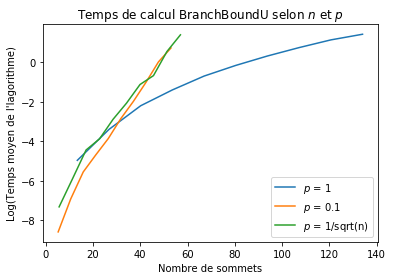

In [136]:
plt.figure(13)
plt.plot(N_BBU, np.log(T_BBU))
plt.plot(N_BBUd, np.log(T_BBUd))
plt.plot(N_BBUs, np.log(T_BBUs))
#plt.plot(N_BBU, T_BBU)
#plt.plot(N_BBUd, T_BBUd)
#plt.plot(N_BBUs, T_BBUs)
plt.title("Temps de calcul BranchBoundU selon $n$ et $p$")
plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.xlabel("Nombre de sommets")
plt.legend(("$p$ = 1","$p$ = 0.1", "$p$ = 1/sqrt(n)"))
plt.show()

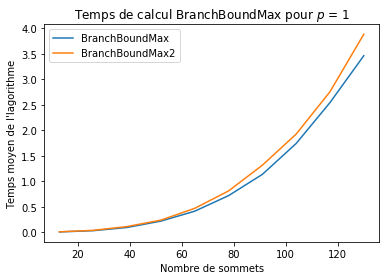

In [137]:
plt.figure(14)
plt.plot(N_BBMax, T_BBMax)
plt.plot(N_BBMax2, T_BBMax2)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBoundMax pour $p$ = 1")
plt.ylabel("Temps moyen de l'lagorithme")
plt.xlabel("Nombre de sommets")
plt.legend(("BranchBoundMax","BranchBoundMax2"))
plt.show()

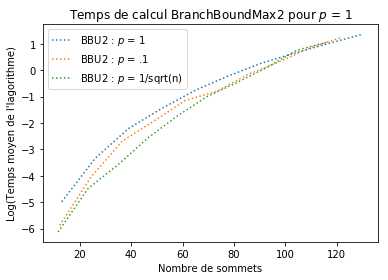

In [138]:
plt.figure(15)
#plt.plot(N_BBMax, T_BBMax)
#plt.plot(N_BBMaxd, T_BBMaxd)
#plt.plot(N_BBMaxs, T_BBMaxs)
plt.plot(N_BBMax2, np.log(T_BBMax2), linestyle=":")
plt.plot(N_BBMax2d, np.log(T_BBMax2d), linestyle=":")
plt.plot(N_BBMax2s, np.log(T_BBMax2s), linestyle=":")
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Temps de calcul BranchBoundMax2 pour $p$ = 1")
plt.ylabel("Log(Temps moyen de l'lagorithme)")
plt.xlabel("Nombre de sommets")
#plt.legend(("algo1 p = 1","algo1 p = .1", "algo1 p = 1/sqrt(n)","algo2 p = 1", "algo2 p = .1","algo2 p = 1/sqrt(n)"))
plt.legend(("BBU2 : $p$ = 1", "BBU2 : $p$ = .1","BBU2 : $p$ = 1/sqrt(n)"))
plt.show()

In [139]:
def testbranch_solutions(algo1,algo2, Nmax1):
    """
    algo1 & algo2 : function, Nmax1 & Nmax2 : int -> list(float), list(float)
    """
    i_ = 10
    P  = np.linspace(0,1,11)
    L_algo1 = []
    print("algo1")
    for p in P:
        m = np.mean([len(algo1(RandomG(Nmax1, p))) for i in range(i_)])
        print("m : ",m)
        L_algo1.append(m)
    
    L_algo2 = []
    print("algo2")
    for p in P:
        m = np.mean([len(algo2(RandomG(Nmax1, p))) for i in range(i_)])
        print("m : ",m)
        L_algo2.append(m)
    return L_algo1, L_algo2, P

In [140]:
Sol_BBMax, Sol_BBMax2, P_BBmax = testbranch_solutions(BranchBoundMax,BranchBoundMax2, 100)

algo1
m :  0.0
m :  72.5
m :  83.4
m :  88.2
m :  90.8
m :  92.9
m :  93.7
m :  95.2
m :  95.9
m :  96.8
m :  99.0
algo2
m :  0.0
m :  72.1
m :  83.5
m :  87.5
m :  90.5
m :  92.7
m :  94.1
m :  95.6
m :  95.6
m :  96.8
m :  99.0


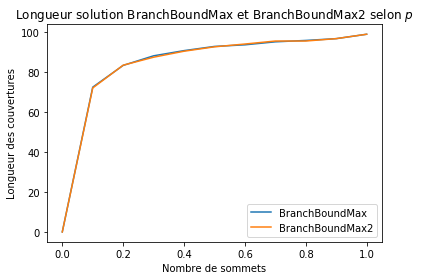

In [141]:
plt.figure(16)
plt.plot(P_BBmax, Sol_BBMax)
plt.plot(P_BBmax, Sol_BBMax2)
plt.title("Longueur solution BranchBoundMax et BranchBoundMax2 selon $p$")
plt.ylabel("Longueur des couvertures")
plt.xlabel("Nombre de sommets")
plt.legend(("BranchBoundMax","BranchBoundMax2"))
plt.show()

In [142]:
BranchBoundMax(Break, time_ = True, noeuds_ = True)

([2, 10, 9, 6, 11, 0, 5], 0.002750873565673828, 15)

In [143]:
BranchBoundMax2(Break, time_=True, noeuds_=True)

([2, 10, 9, 6, 11, 0, 5], 0.004440784454345703, 15)

In [144]:
BranchBoundU(Break, time_ = True, noeuds_ = True)

([2, 0, 10, 11, 5, 9, 8], 0.005611896514892578, 29)

In [145]:
BranchBoundU(Break, time_ = True, noeuds_ = True)

([2, 0, 10, 11, 5, 9, 8], 0.005031108856201172, 29)

In [146]:
BranchBound(Break, time_ = True, noeuds_ = True)

([2, 0, 10, 11, 5, 9, 8], 0.013675928115844727, 33)

In [147]:
BranchS(Break, time_ = True, noeuds_=True)

([2, 0, 10, 11, 5, 9, 8], 0.07387781143188477, 939)

In [148]:
BranchF(Break, time_ = True, noeuds_=True)

([2, 0, 10, 11, 5, 9, 8], 0.1129610538482666, 939)

In [149]:
BranchF(G1, time_=True, noeuds_=True)

([1, 3], 0.0008091926574707031, 11)

In [150]:
BranchS(G1, time_=True, noeuds_=True)

([1, 3], 0.0005419254302978516, 11)

In [151]:
BranchBound(G1, time_=True, noeuds_=True)

([1, 3], 0.0006577968597412109, 5)

In [152]:
BranchBoundU(G1, time_=True, noeuds_=True)

([1, 3], 0.0006859302520751953, 5)

In [153]:
BranchBoundMax(G1, time_=True, noeuds_=True)

([1, 3], 0.0005939006805419922, 5)

###  4.3 Qualité des algorithmes approchés :

In [154]:
def test_rapportApprox(algo1, algo2, algoA, Nmax1, Nmax2, proba = lambda i : 1./np.sqrt(i)):
    i_ = 10
    Nmax = min(Nmax1, Nmax2)
    N_ = np.linspace(Nmax/10,Nmax,10)
    RA_1 = []
    RA_2 = []
    for n in N_:
        if type(proba) == int or type(proba) == float:
            G = RandomG(ceil(n), proba)
            m1 = np.mean([ len(algo1(G))/ len(algoA(G))for i in range(i_)])
            m2 = np.mean([ len(algo2(G))/ len(algoA(G))for i in range(i_)])
        else:
            G = RandomG(ceil(n), proba(ceil(n)))
            m1 = np.mean([ len(algo1(G))/ len(algoA(G))for i in range(i_)])
            m2 = np.mean([ len(algo2(G))/ len(algoA(G))for i in range(i_)])
        RA_1.append(m1)
        RA_2.append(m2)
        
    return N_, RA_1, RA_2

In [155]:
N_ACG, RA_C, RA_G = test_rapportApprox(algo_couplage, algo_glouton, BranchBoundMax2, 120, 140, proba = probaG)

In [156]:
N_ACG, RA_Cd, RA_Gd = test_rapportApprox(algo_couplage, algo_glouton, BranchBoundMax2, 120, 140, proba = .1)

In [157]:
N_ACG, RA_Cs, RA_Gs = test_rapportApprox(algo_couplage, algo_glouton, BranchBoundMax2, 120, 140)

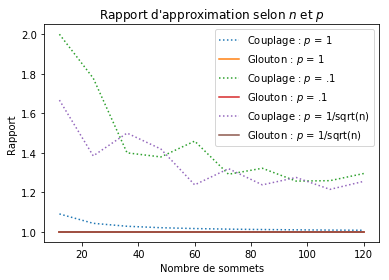

In [158]:
plt.figure(17)
plt.plot(N_ACG, RA_C, linestyle=":")
plt.plot(N_ACG, RA_G)
plt.plot(N_ACG, RA_Cd, linestyle=":")
plt.plot(N_ACG, RA_Gd)
plt.plot(N_ACG, RA_Cs, linestyle=":")
plt.plot(N_ACG, RA_Gs)
#plt.plot(N_BS, np.log(np.exp(N_BS)) -11)
#plt.axis([0,2500, -3.5, 1.5])
plt.title("Rapport d'approximation selon $n$ et $p$")
plt.ylabel("Rapport")
plt.xlabel("Nombre de sommets")
#plt.legend(("algo1 p = 1","algo1 p = .1", "algo1 p = 1/sqrt(n)","algo2 p = 1", "algo2 p = .1","algo2 p = 1/sqrt(n)"))
plt.legend(("Couplage : $p$ = 1", "Glouton : $p$ = 1", "Couplage : $p$ = .1","Glouton : $p$ = .1","Couplage : $p$ = 1/sqrt(n)", "Glouton : $p$ = 1/sqrt(n)"))
plt.show()

In [163]:
G1test = lecture_graphe("expl1.txt")

In [164]:
BranchBoundU(G1test)

[2, 8, 6, 4]